In [2]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [3]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-29 20:25:35.380666: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-29 20:25:35.382756: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 20:25:35.421997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 20:25:35.422963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [4]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [5]:
df_rating_raw[df_rating_raw['Title'] == 'West Side story']

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814312,B000711OZC,West Side story,NaN,A3FV7U97W17PK,"M. Chaerani ""music sheet collector""",26/26,5.0,1145491200,Great transcription of the full score,If you're looking for a faithful translation f...
1814313,B000711OZC,West Side story,NaN,A14ES1GLFF6RZ9,"The Pianoman ""Producer/Arranger""",6/7,5.0,1189987200,West Side Vocal Score,If you want to play/arrange/orchestrate or sim...
1814314,B000711OZC,West Side story,NaN,APYTEBHJXFT18,Teen,4/5,4.0,1167177600,For the intermediate,The book is medium-it isn't an easy book you o...
1814315,B000711OZC,West Side story,NaN,A3H9EZYOVG81TW,Broadway Fan,1/1,5.0,1332374400,West Side Story,This book is perfect. We are rehearsing West S...
1814316,B000711OZC,West Side story,NaN,A1IWMVQGALYNVK,C. Morgan,3/4,5.0,1199145600,High Quality Printing,The piano and vocals are clearly printed which...
1814317,B000711OZC,West Side story,NaN,AZUS7ZIZWEJ0B,"Rebecca L. Gosselin ""Capegirl78""",0/0,5.0,1355702400,Fab!,this was perfect - I wanted to real versions o...
1814318,B000711OZC,West Side story,NaN,A1F2FPNK5VBJZ4,"W. Smith ""Future Tony Winner""",0/0,5.0,1264636800,A Composer/Orchestrator's Best Friend,My original intention was to buy this and use ...
1814319,B000711OZC,West Side story,NaN,A2DGD1PGXR5BZM,Olivertrst,0/1,3.0,1319241600,Disappointed -- Bent in shipping,I was disappointed when I received this book i...
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."


In [6]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
786367,0425067785,Cards on the Table,NaN,A4FX5YCJA630V,"R. M. Fisher ""Raye""",1/1,5.0,1300579200,"""A Murderer Can Be An Artist...""","Written at the height of her powers, ""Cards on..."
193108,B000P1QRII,The Giver,NaN,A1TW7LV1XPUBZZ,"Enrique 003 1/2 ""Henry 003 1/2""",0/0,5.0,1349481600,giver...love it,great book for an eigh grader..my students lov...
2956248,0273653296,10 Lessons From the Future: Tomorrow Is a Matt...,NaN,A3MIFOIZUQ74QB,G. S. P.,0/0,4.0,1269129600,10 lessons from the future,To read this book is a good way to be updated ...
976511,0451513940,Jude the Obscure,NaN,A2FQWOT8RBCDXI,Katy Jensen,0/2,3.0,1036800000,Jude is a bit too obscure,"After finishing Jude the Obscure, the reader i..."
1933521,B000N6DGKW,The Scarlet Letter A Romance,NaN,NaN,NaN,0/0,4.0,880243200,SAD,this book represents a time in the past of our...
1603381,B000ETWJ74,Who Moved My Cheese? An-Amazing Way to Deal wi...,NaN,A3QHPRPI7E48ND,"""healingchristian""",1/2,2.0,1029888000,"Stephen R. Covey, maybe he doesn't like this b...","Stephen R. covey, in his book ""The 7 habits of..."
884927,0816148015,The Phantom Tollbooth (G.K. Hall large print f...,NaN,A22WR4FLNY1WIO,"L. Naylor ""reading mom""",0/0,5.0,1349395200,Charming,Phantom Tollbooth is such a terrific book blen...
2337824,1569244677,Slow Fat Triathlete: Live Your Athletic Dreams...,10.09,AICIJ5Y5VUNUV,Murry Zborowski,0/0,2.0,1241395200,cute,Cute and uplifting a fun read but light on any...
1915631,0613968395,Women Invent: Two Centuries of Discoveries Tha...,NaN,NaN,NaN,9/10,5.0,940982400,A Great Book about Women Inventors,Women Invent! is a cool book and there should ...
2650513,0749395338,Bombardiers,NaN,A255AFDYKEGC3H,Peter,4/5,2.0,981244800,Hacked,Po's story about the world of investing kept m...


In [7]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [8]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
81065,When We Were Wolves: Stories,"""If you could have been around a hundred and f...",['Jon Billman'],http://books.google.com/books/content?id=i2kyK...,http://books.google.com/books?id=i2kyKZuL7OAC&...,Random House,2009-07-01,https://play.google.com/store/books/details?id...,['Fiction'],NaN
91703,"Where have you gone, Joe DiMaggio?: The story ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139945,The Hunting Party,THE NEW YORK TIMES BESTSELLER “My favorite kin...,['Lucy Foley'],http://books.google.com/books/content?id=SUdfD...,http://books.google.com/books?id=SUdfDwAAQBAJ&...,HarperCollins,2019-02-12,https://play.google.com/store/books/details?id...,['Fiction'],36.0
200536,"Spirit of the Wind: The Story of George Attla,...","In 1958, no one in the Fur Rendezvous World Ch...",['Lew Freedman'],http://books.google.com/books/content?id=fi5cr...,http://books.google.com/books?id=fi5cr1jESmEC&...,Epicenter Press,2000,https://play.google.com/store/books/details?id...,['Biography & Autobiography'],NaN
54240,Caught,The bestselling author and creator of the hit ...,['Harlan Coben'],http://books.google.com/books/content?id=R9KMD...,http://books.google.com/books?id=R9KMDwAAQBAJ&...,Penguin,2019-04-09,http://books.google.com/books?id=R9KMDwAAQBAJ&...,['Fiction'],91.0
173597,Unlikely Angel : The Untold Story of the Atlan...,"In April 2005, Ashley Smith made headlines aro...","['Ashley Smith', 'Stacy Mattingly']",http://books.google.com/books/content?id=fr1FB...,http://books.google.com/books?id=fr1FBn8jkoAC&...,Harper Collins,2010-11-16,https://play.google.com/store/books/details?id...,['Religion'],138.0
51075,I Never Called It Rape: The Ms. Report on Reco...,A ground-breaking report on the hidden epidemi...,['Robin Warshaw'],http://books.google.com/books/content?id=gGJHA...,http://books.google.com/books?id=gGJHAAAAMAAJ&...,Harpercollins,1988,http://books.google.com/books?id=gGJHAAAAMAAJ&...,['Social Science'],1.0
79508,Electric Melting of Glass (Glass science and t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147554,Blandings Castle,"""I envy those who’ve never read [Wodehouse] be...",['P. G. Wodehouse'],http://books.google.com/books/content?id=orKIL...,http://books.google.com/books?id=orKILfw6ET8C&...,W. W. Norton & Company,2012-07-02,https://play.google.com/store/books/details?id...,['Fiction'],NaN
209288,The Pelican History of Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [10]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [11]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.  
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [12]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/text
352970,The Quest of the Warrior Woman: Women As Mysti...,NaN,5.0,936057600,This book is a wonderful find for any woman th...
954881,Giovanni's room (Signet book # S1559),A1L3D1AF739ZIC,5.0,935884800,It moved me beyond belief and I could not set ...
489131,Tess of the d'Urbervilles,A2MVUILDRW43GC,1.0,952560000,I recommend this book as kindling for a fire. ...
2766243,Andrew Henry's Meadow Weekly Reader Childrens ...,NaN,4.0,1077580800,There was something about the wonder of creati...
1826009,Marine sniper: 93 confirmed kills,A37OBORI3NMXUV,4.0,1341964800,This book is an easy to read experience report...
627778,"KJV/Amplified Parallel Bible, Large Print (Kin...",A2QYL8PXS6MPRG,2.0,1199750400,waited to order this bible hoping it would aid...
2834287,A Member of the Family,NaN,5.0,955238400,Merrell's novel is complex and beautifully dra...
1066830,Prelude To Foundation,A2ASE6EJRB2H,1.0,1240704000,"To start, I want to say that I am a big fan of..."
1636290,"Frommer's(r) Nova Scotia, New Brunswick & Prin...",A2CRUD8LHJ35P5,4.0,1033603200,I am planning my first trip to Nova Scotia for...
593154,How to Stay Alive in the Woods,NaN,5.0,913075200,"Angier's book, How to Stay Alive in the Woods,..."


In [13]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [14]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
text                8
dtype: int64

In [15]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [16]:
#CLEAN THE DATASETS

In [17]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [18]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
131849,Fundamentals of Skeletal Radiology,['Clyde A. Helms'],Elsevier,2019-02-15,NaN
149893,Friendship Fires,['Sam Cook'],U of Minnesota Press,NaN,NaN
25982,Your Home Library: The Complete System for Org...,['Kathie Coblentz'],Running PressBook Pub,2003,['Reference']
63246,Tess of the D'urbervilles (Summer Classics),['Thomas Hardy'],NaN,1892,['Children of clergy']
55091,Taming the Wild Field: Colonization and Empire...,['Willard Sunderland'],Cornell University Press,2016-03-10,['History']


In [19]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [20]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [21]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [22]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
169538,Not with My Child,['Dr. Frank Lawlis'],"Hay House, Inc",['Family & Relationships'],2014
107183,Children of a Lesser God,['Mark Howard Medoff'],"Dramatists Play Service, Inc.",['Drama'],1980
159832,Algebra 2: An Incremental Development (Saxon A...,"['John H. Saxon, Jr.', 'Saxon Publishers']",Saxon Pub,['Mathematics'],2006
52145,GUNNAR CORE SECRETS AB ASSAULT DVD,NaN,NaN,['Fashion'],2005
125475,"The Unconquered Isle, The Story of Malta G.C",['Ian Hay'],NaN,['Malta'],1943
87736,Fun in a Chinese laundry: An autobiography,['Josef Von Sternberg'],NaN,['Cinéma'],1973
187421,Exemplary novels of Cervantes,['Miguel de Cervantes'],Margellos World Republic of Letters,NaN,2018
32020,War Between Russia and China,['Harrison Evans Salisbury'],W. W. Norton,['History'],1970
47103,"Acting With an Accent, Stage Dialect Instructi...",['Paul Meier'],NaN,['Acting'],2006
79026,AH-64 Apache Units of Operations Enduring Free...,['Jonathan Bernstein'],Bloomsbury Publishing,['History'],2012


In [23]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [24]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [25]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [26]:
df_rating_processed.sample(5)

,title,user_id,review,review_time,text
1507867,Career development for youth (Going to work: c...,AMUQ6REW0YF9G,4.0,1066348800,"I loved this book, I would have given it 5 sta..."
1146654,Another country,A2YXRT2XIJIO57,5.0,1314576000,"I first read this book in 1966, during a summe..."
1994652,The Courage of Sarah Noble Study Guide,NaN,5.0,1006214400,I liked this book because I like braverey and ...
2504441,Of Mice and Men,ADWE0UPOO9BVK,2.0,1335139200,This was another read for my English class's b...
565573,Hell in a very small place;: The siege of Dien...,AHDEWL4301OD7,5.0,961200000,This book can be broken down into two categori...


In [27]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [28]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year
2938890,Martyn Pig,NaN,4.0,My book is about a young teenager that lost hi...,2006
619094,Under the Black Flag: The Romance and the Real...,A34F7OYHYFMIJ2,5.0,What a fantastic way to learn about Pirates! T...,1999
2840275,Tenth Circle,AG2IEP1MJQHFS,3.0,Incorporating Dante's Inferno and comic book a...,2007
1772006,The wind in the willows,A3PO71WPJ7EB75,5.0,This is a wonderful classic childrens book! I ...,2009
820534,Chicken Soup for the African American Soul: Ce...,A3NE2X2XEKGTFX,5.0,This collection of stories embraces African-Am...,2005
850500,Of Mice And Men,NaN,3.0,"I don't see the reason for the ending, but the...",1997
2569436,The Dark Tower VII,A5ZVJ9A6H1YL1,4.0,Stephen King is a harsh master. This is the fi...,2004
2423578,Filth,NaN,5.0,Just when you think Welsh's supremo hun Edinbu...,1999
595585,Assassination of Light: Modern Saudi Short Sto...,NaN,4.0,this collection of short stories puzzled me an...,2000
2217858,Mirror Dance (Miles Vorkosigan Adventures),A1WXFL6IXQKAM5,5.0,. . . and I've read 'em all. :)&quot;Mirror Da...,2003


In [29]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 183.1+ MB


In [30]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
248654,Green Eyes,A2ZP67U9WMYT3F,5.0,Fifteen (Avon Camelot Books)The Luckiest Girl ...,2009,[Lucius Shepard],Ace Books,[Fiction],1984
142352,Great Expectations,A3KY20QXYEVGYF,5.0,Dickens' ability to turn a beautiful phrase is...,2005,[Charles Dickens],Penguin UK,[Fiction],2003
513614,Great Expectations (Enriched Classics),AYW46MV5LXPWT,5.0,Great Expectations by Charles Dickens is a sup...,2000,[Charles Dickens],Oxford University,[Foreign Language Study],2000
875665,All Roads Lead to Murder: A Case From the Note...,A12R0XLTKUF6FV,3.0,Not up to par as a mystery but a colorful arra...,2009,[Albert A. Bell],NaN,None,2016
1067772,Small Stakes Hold 'em: Winning Big With Expert...,A3V337BZVBOB23,5.0,Excellent book on Small Stakes Holdem! Extensi...,2005,"[Ed Miller, David Sklansky, Mason Malmuth]",Two Plus Two Publishing LLC,[Games & Activities],2004
2139142,The New Shorter Oxford English Dictionary,A3QOJR98J3AQWT,5.0,Demotic vorticist pages go from 2400 to 2393 t...,2011,[Lesley Brown],NaN,[English language],1993
324008,"Cranford;: A play from Mrs. Gaskell's novel,",A1ARAM9EHJ3J5N,5.0,A lovely book about a lovely village of lovely...,2010,"[Elizabeth Cleghorn Gaskell, Anne Dashiell, ...",NaN,None,1902
139311,Little Women,NaN,5.0,My God-mother gave me this book. After chapter...,2004,[Louisa May Alcott],Lindhardt og Ringhof,[Fiction],2018
357828,The Bear and the Dragon,NaN,1.0,There are so many things wrong with this book ...,2001,[Tom Clancy],Penguin,[Fiction],2001
1400040,"The Dragonbone Chair (Memory, Sorrow, & Thorn ...",A1C9L9X2AC0SQ2,5.0,"Wow, this book and series is wonderful. I firs...",1999,[Tad Williams],Penguin,[Fiction],2005


In [31]:
#APPLY PARETO PRINCIPLE:
# Pareto Principle, also known as the 80/20 rule, is used for reducing the dataset based on the most reviewed books 
# This is a good approach to focus on the most significant or popular books. The Pareto Principle suggests that 
# roughly 80% of the effects come from 20% of the causes. In this case, Pareto principle to identify
# and keep the most influential books and their associated reviews. 

In [32]:
# Group the reviews by book and count the number of reviews for each book
book_reviews_count = df_all_data_processed['title'].value_counts().reset_index()
book_reviews_count.columns = ['title', 'num_reviews']

In [33]:
book_reviews_count.sample(10)

,title,num_reviews
67145,Cooking with Green Tea: Delicious dishes enhan...,5
73424,Casting for Big Ideas: A New Manifesto for Age...,4
98974,The Truth,3
168373,Discovering Portuguese: An Introduction to the...,1
51294,Azerbaijan (Cultures of the World),7
140265,A Crowd of Witnesses,1
65461,A Survey of Ecological Economics (Frontier Iss...,5
105359,"Ford Tractors: N-Series, Fordson, Ford and Fer...",2
48682,IN SOLITARY WITNESS: The Life and Death of Fra...,7
12098,The Year of the Hare (Unesco Collection of Rep...,32


In [34]:
# Sort the DataFrame by the number of reviews in descending order
book_reviews_count.sort_values(by='num_reviews', ascending=False, inplace=True)

In [35]:
book_reviews_count.head(10)

,title,num_reviews
0,The Hobbit,22023
1,Pride and Prejudice,20371
2,Wuthering Heights,10780
3,The Giver,7644
4,Great Expectations,7421
5,Harry Potter and The Sorcerer's Stone,6796
6,Brave New World,6312
7,Mere Christianity,6053
8,The Picture of Dorian Gray,5883
9,Persuasion,5498


In [36]:
# Calculate the cumulative percentage of reviews
total_reviews = book_reviews_count['num_reviews'].sum()
book_reviews_count['cumulative_percentage'] = (book_reviews_count['num_reviews'].cumsum() / total_reviews) * 100
book_reviews_count.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [37]:
pareto_threshold = 20
# Select the subset of books that make up the top Pareto_threshold% of reviews
selected_books = book_reviews_count[book_reviews_count['cumulative_percentage'] <= pareto_threshold]
selected_books.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [38]:
df_all_data_filtered_processed = df_all_data_processed.merge(selected_books, on='title', how='inner')
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532868 entries, 0 to 532867
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  532868 non-null  object 
 1   user_id                406985 non-null  object 
 2   review                 532868 non-null  float64
 3   text                   532868 non-null  object 
 4   review_year            532868 non-null  int64  
 5   authors                526675 non-null  object 
 6   publisher              448830 non-null  object 
 7   categories             465707 non-null  object 
 8   published_year         532868 non-null  int64  
 9   num_reviews            532868 non-null  int64  
 10  cumulative_percentage  532868 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 44.7+ MB


In [39]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    336553
4.0     95230
3.0     40291
1.0     35916
2.0     24878
Name: count, dtype: int64

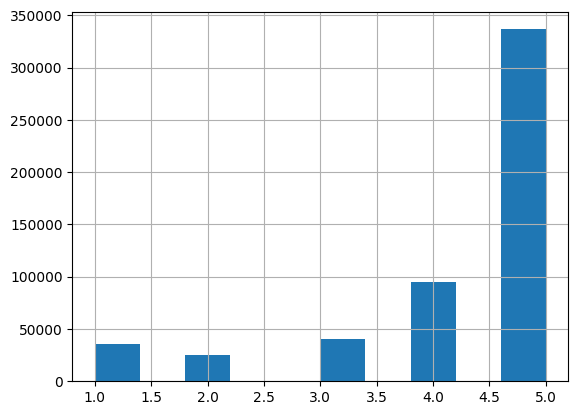

In [40]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [41]:
df_all_data_filtered_processed.isna().sum()

title                         0
user_id                  125883
review                        0
text                          0
review_year                   0
authors                    6193
publisher                 84038
categories                67161
published_year                0
num_reviews                   0
cumulative_percentage         0
dtype: int64

In [42]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year,num_reviews,cumulative_percentage
181505,Pride and Prejudice,A116J8AUC3JSN2,4.0,"I enjoyed Pride and Prejudice, by Jane Austen,...",2008,[Jane Austen],Courier Corporation,[Fiction],1995,20371,1.589985
241025,Harry Potter and The Sorcerer's Stone,NaN,5.0,I thick it is good.But it sounld be more real....,2001,[J. K. Rowling],Bloomsbury Publishing,[Juvenile Fiction],2014,6796,2.814185
246781,Harry Potter and The Sorcerer's Stone,A2MFLP6SFJ3MLM,5.0,I thought that this book was delightful in man...,1999,[J. K. Rowling],Bloomsbury Publishing,[Juvenile Fiction],2014,6796,2.814185
102309,The Old Man and the Sea,A3R34OF07C6SKH,4.0,the old man and the sea was a fairly moralic b...,2003,[Ernest Hemingway],Hueber Verlag,None,1975,1830,11.472017
154947,Persuasion,A3MLHP2P96HHZJ,5.0,"As always, an Austen novel is a pleasure to sa...",2009,[Jane Austen],"Little, Brown,",None,1899,5498,3.704777
133271,The Hitchhiker's Guide to the Galaxy,A19XD98DT83MPD,3.0,I read HHGG way back in college. I thought it ...,2012,[Douglas Adams],Harmony,[Science],1994,4042,5.072846
254137,THE CATCHER IN THE RYE,A2J3JHUX7AK9EC,5.0,If you're looking for a grand book in which th...,2001,[J.D. Salinger],"Little, Brown",[Fiction],1951,3260,6.025059
94221,The Giver,AEW33T8XKR08Y,3.0,Taking a look into a possible future eutopia i...,2013,[Lois Lowry],Harcourt Brace,[Juvenile Fiction],2014,7644,2.280977
316150,"Winter's Heart (The Wheel of Time, Book 9)",A372R6X0W15Y2Z,5.0,This is definately one of my favorite WOT book...,2003,[Robert Jordan],Tor Books,[Fiction],2010,1152,16.067537
254629,THE CATCHER IN THE RYE,A37UFPHXANDT56,4.0,"As many people previously said, this book is a...",2010,[J.D. Salinger],"Little, Brown",[Fiction],1951,3260,6.025059


In [43]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['title','user_id', 'review', 'text'])

In [45]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()

In [46]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  339620 non-null  int64  
 1   title                  339620 non-null  object 
 2   user_id                253152 non-null  object 
 3   review                 339620 non-null  float64
 4   text                   339620 non-null  object 
 5   review_year            339620 non-null  int64  
 6   authors                334206 non-null  object 
 7   publisher              282177 non-null  object 
 8   categories             309345 non-null  object 
 9   published_year         339620 non-null  int64  
 10  num_reviews            339620 non-null  int64  
 11  cumulative_percentage  339620 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 31.1+ MB


In [47]:
#Recomendacion de Manu para procesamiento
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
26955,26955,Hi... I decided to write my own review after s...
97213,97213,It was once noted that the world is divided in...
181438,181438,There are some books that are impeccably plott...
78762,78762,I have read this great play of literature so m...
202892,202892,I find this book to be directly in line with w...
267449,267449,Don't miss this classic book!!!! Plz
237464,237464,"Predictable, clich&eacute;, sappy and no chara..."
196445,196445,This is an absolute gorgeous book. This is som...
2507,2507,"This book is a classic, and should be read by ..."
14047,14047,I thought that it was a compelling example of ...


In [48]:
df_reduced.to_csv('../data/processed/df_reduced.csv')